# Overview

### This project aims to discover how to make the most profitable movie possible in order to make business recommendations to Microsoft. Descriptive analyses of a variety of data on previously released movies reveal that the most profitable movie Microsoft could make is an adventure movie with an NR rating, directed by Jean Negulsesco, with a runtime between 100 minutes and 131 minutes, at Buena Vistas studios.

# Business Problem

### Microsoft wants to open a movie studio that can compete with other successful movie studios. However, they lack knowledge about filmmaking. To help them in this area, we will find out how a variety of factors affect the popularity of movies and offer recommendations.

# Data

### We examined data on gross, genre, studio, director, release date, MPR rating, Rotten Tomatoes score, and run time. Variables like gross and Rotten Tomatoes score served as measures of the success of movies. The relationship between the rest of the variables and those two measures of success demonstrate what factors can be relied upon to make a profitable movie.

# Methods

### Our process started with organizing our data by dropping irrelevant columns, creating new ones, sorting by specific values, and merging dataframes. While modeling our data, we used descriptive statistics to create helpful visuals that displayed our findings. Overall, our descriptive analysis is absolutely essential for anyone looking to succeed in the movie industry.

## Importing libraries



We imported the Pandas, Numpy, Seaborn, and Matplotlib libraries so we could use them to manipulate the dataset and create visualizations for it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

## Importing tn.movie_budgets.csv.gz and imdb.title.basics.csv.gz CSV Files and merging the files

In [2]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df_2 = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df_meg = pd.merge(df, df_2, how='inner', left_on='movie', right_on='primary_title')
df_meg.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


## Checking to see how much of the Column is missing based off Percentage 

In [3]:
for col in df_meg.columns:
    pct_missing = np.mean(df_meg[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
release_date - 0.0%
movie - 0.0%
production_budget - 0.0%
domestic_gross - 0.0%
worldwide_gross - 0.0%
tconst - 0.0%
primary_title - 0.0%
original_title - 0.0%
start_year - 0.0%
runtime_minutes - 13.0%
genres - 2.0%


## Dropping as well as Splitting and Replacing Columns to make it a cleaner data frame

In [4]:
cols_to_drop = ['runtime_minutes','start_year','original_title','id' ,'production_budget', 'release_date','tconst','primary_title']
df_mod_2 = df_meg.drop(cols_to_drop, axis=1)
df_mod_2["genres"] = df_mod_2["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
df_mod_2["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df_mod_2["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df_mod_2.head()

,movie,domestic_gross,worldwide_gross,genres
0,Avatar,760507625,2776345279,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,241063875,1045663875,"[Action, Adventure, Fantasy]"
2,Dark Phoenix,42762350,149762350,"[Action, Adventure, Sci-Fi]"
3,Avengers: Age of Ultron,459005868,1403013963,"[Action, Adventure, Sci-Fi]"
4,Avengers: Infinity War,620181382,1316721747,"[Action, Adventure, Sci-Fi]"


## Exploding the Genres Column as well as changing the Zeros to Nan then Dropping Nan's

In [5]:
df_explode = df_mod_2.explode('genres')
df_explode.replace(0, np.nan, inplace=True)
df_explode[df_explode.isna().any(axis=1)]
df_explode = df_explode.dropna()
print(df.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


## Grouping by Genres means and sorting it by worldwide_gross as well as setting index to Movies in order to render an effective branch.

In [6]:
df_explode.groupby('genres').mean()
df_explode= df_explode.sort_values("worldwide_gross", ascending=False).set_index('movie')
df_top_50 = df_explode

## Plotting the data in a Bar Plot

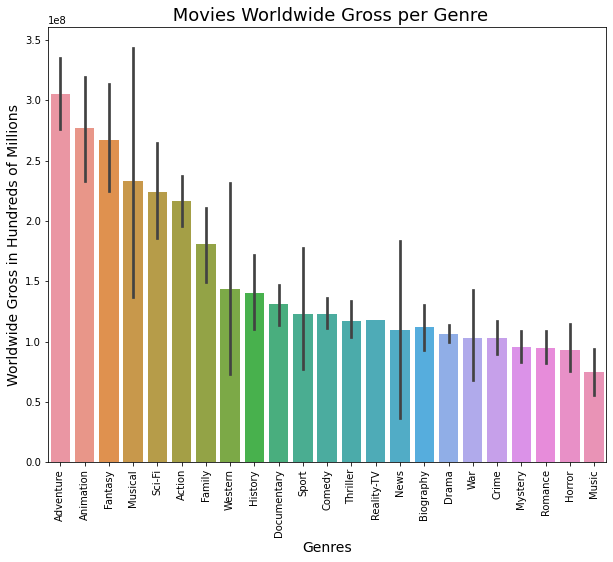

In [7]:
plt.figure(figsize=(10, 8))
sns.barplot(x='genres', 
            y='worldwide_gross',
            order=["Adventure","Animation","Fantasy","Musical",'Sci-Fi','Action', 'Family',"Western","History",'Documentary', 'Sport',"Comedy",'Thriller',"Reality-TV",'News','Biography','Drama', 'War','Crime','Mystery', 'Romance','Horror',"Music"],
            data=df_top_50,)
plt.ylabel("Worldwide Gross in Hundreds of Millions", size=14)
plt.xlabel("Genres", size=14)
plt.title(" Movies Worldwide Gross per Genre", size=18)
plt.tick_params(axis='x', labelrotation=90)
plt.savefig("images/grouped_barplot_Seaborn_barplot_Python_corrected.png")

### This renders the data of what genre of movie Microsoft should make based off the highest Worldwide Gross

## Work on tmdb_movies_data.csv.zip CSV

## Importing CSV and Dropping Columns

In [8]:
df3 = pd.read_csv('data/zippedData/tmdb_movies_data.csv.zip')
cols_to_drop = ['id', 'imdb_id','cast', 'homepage', 'director','tagline', 'overview', 'production_companies','keywords' ,'vote_count','genres','release_date','release_year','vote_average','budget_adj','popularity','revenue_adj']
df_mod = df3.drop(cols_to_drop, axis=1)
df_mod.head()

,budget,revenue,original_title,runtime
0,150000000,1513528810,Jurassic World,124
1,150000000,378436354,Mad Max: Fury Road,120
2,110000000,295238201,Insurgent,119
3,200000000,2068178225,Star Wars: The Force Awakens,136
4,190000000,1506249360,Furious 7,137


## Replacing zeros with nan and dropping the nan's in order to work more effectivly in the data set

In [9]:
df_mod.replace(0, np.nan, inplace=True)
df_mod[df_mod.isna().any(axis=1)]
df_mod = df_mod.dropna()
print(df_mod.isnull().sum())

budget            0
revenue           0
original_title    0
runtime           0
dtype: int64


## Sorting Values in ascending order for Revenue in order to render the highest moves with revenue

In [10]:
df_mod= df_mod.sort_values("revenue", ascending=False)
df_mod.describe()

,budget,revenue,runtime
count,3.855000e+03,3.855000e+03,3855.000000
mean,3.720183e+07,1.076589e+08,109.215824
std,4.220291e+07,1.765248e+08,19.922166
min,1.000000e+00,2.000000e+00,15.000000
25%,1.000000e+07,1.357645e+07,95.000000
50%,2.400000e+07,4.479322e+07,106.000000
75%,5.000000e+07,1.241530e+08,119.000000
max,4.250000e+08,2.781506e+09,338.000000


## Setting parameters based of a film has to be 40 min to be considered a movie and removing the outliers that skew the Data

In [11]:
df_mod2 = df_mod.loc[(df_mod['runtime'] >= 40) & (df_mod['runtime'] <= 190) & (df_mod['revenue'] > 226830568) & (df_mod['revenue'] < 2068178225)]
df_mod2.head()

,budget,revenue,original_title,runtime
4361,220000000.0,1.519558e+09,The Avengers,143.0
0,150000000.0,1.513529e+09,Jurassic World,124.0
4,190000000.0,1.506249e+09,Furious 7,137.0
14,280000000.0,1.405036e+09,Avengers: Age of Ultron,141.0
3374,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,130.0


## Creating  variables for insertion into Graph so the shaded area can be created

In [12]:
runtime_25_percentile = df_mod2['runtime'].quantile(.25)
runtime_75_percentile = df_mod2['runtime'].quantile(.75)

## Plotting Data in a Scatter Plot

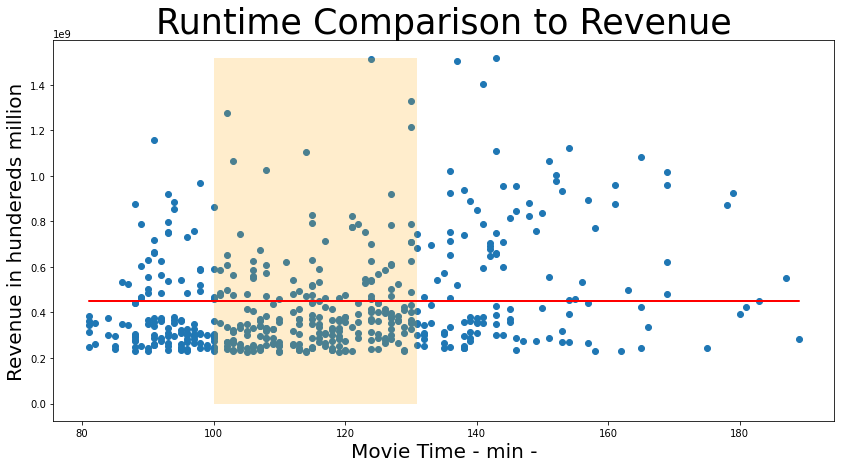

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
data = df_mod2[['runtime', 'revenue']]
x = data['runtime']
y = data['revenue']
plt.scatter(x, y)
z = np.polyfit(x, y, 0)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.title('Runtime Comparison to Revenue', fontsize=35)
plt.xlabel('Movie Time - min -', fontsize=20)
plt.ylabel('Revenue in hundereds million', fontsize= 20)
plt.fill_between([runtime_25_percentile, runtime_75_percentile], max(y), facecolor='orange', alpha=.2)
plt.savefig("images/Runtime_Comparison_line_added.png")
plt.show()

### This comparison of Runtime to Revenue tells that there is no true monetary value of creating a movie outside the shaded area

# Working on Rotten Tomatoes Movies CSV

## Calling the CSV rotten_tomatoes_movies.csv

In [14]:
df_4 = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df_4.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


## Dropping columns and Null values to get the column with correct values needed

In [15]:
cols_to_drop = ['critics_consensus', 'movie_info','directors', 'authors', 'actors', 'streaming_release_date','runtime', 'production_company', 'tomatometer_count', 
                'audience_status', 'tomatometer_rating', 'audience_count', 'tomatometer_top_critics_count','audience_rating','original_release_date', 'rotten_tomatoes_link' ,'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
df_dropped_colums = df_4.drop(cols_to_drop, axis=1)
df_dropped_colums.replace(0, np.nan, inplace=True)
df_dropped_colums[df_dropped_colums.isna().any(axis=1)]
df_dropped_colums = df_dropped_colums.dropna()
print(df_dropped_colums.isnull().sum())

movie_title           0
content_rating        0
genres                0
tomatometer_status    0
dtype: int64


## Splitting the Genres Column on the ","  and Exploding and isolating the Adventure Genres

In [16]:
df_dropped_colums["genres"] = df_dropped_colums["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

df_explode_2 = df_dropped_colums.explode('genres')

new_df = df_explode_2[df_explode_2['genres'].str.contains('Action & Adventure')]
new_df

,movie_title,content_rating,genres,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,PG,Action & Adventure,Rotten
4,"20,000 Leagues Under The Sea",G,Action & Adventure,Fresh
5,"10,000 B.C.",PG-13,Action & Adventure,Rotten
6,The 39 Steps,NR,Action & Adventure,Certified-Fresh
18,The Adventures of Mark Twain,G,Action & Adventure,Fresh
...,...,...,...,...
17702,Zoo,PG,Action & Adventure,Fresh
17706,Zoom,PG,Action & Adventure,Rotten
17708,Zootopia,PG,Action & Adventure,Certified-Fresh
17709,Zorba the Greek,NR,Action & Adventure,Fresh


## Setting Index replacing the Ratings with values and setting those values to 1 then Grouping by content_rating, tomatometer_status

In [17]:
new_df.set_index('genres')
new_df.replace({'G': 0, 'PG': 1, 'PG-13': 2, 'NC17': 3, 'NR': 4, 'R': 5})
new_df['movie_count'] = 1
df_cor = new_df.groupby(['content_rating', 'tomatometer_status']).count()
df_cor

<ipython-input-17-2da686128ab3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movie_count'] = 1


movie_title  genres  movie_count
content_rating tomatometer_status                                  
G              Certified-Fresh              24      24           24
               Fresh                        94      94           94
               Rotten                       68      68           68
NC17           Fresh                         1       1            1
NR             Certified-Fresh              41      41           41
               Fresh                       354     354          354
               Rotten                      191     191          191
PG             Certified-Fresh             112     112          112
               Fresh                       189     189          189
               Rotten                      304     304          304
PG-13          Certified-Fresh             160     160          160
               Fresh                       138     138          138
               Rotten                      504     504          504
R              Certified-Fresh             210     210          210
               Fresh                       341     341          341
               Rotten                      811     811          811

## Resetting Index and Dropping the Generes column to keep the Genre Column in order to retain Adventure

In [18]:
df_cor = df_cor.reset_index()
cols_to_drop = ['genres']
df_drop = df_cor.drop(cols_to_drop, axis=1)
df_drop.head()

,content_rating,tomatometer_status,movie_title,movie_count
0,G,Certified-Fresh,24,24
1,G,Fresh,94,94
2,G,Rotten,68,68
3,NC17,Fresh,1,1
4,NR,Certified-Fresh,41,41


## Ploting the data in a Bar Graph

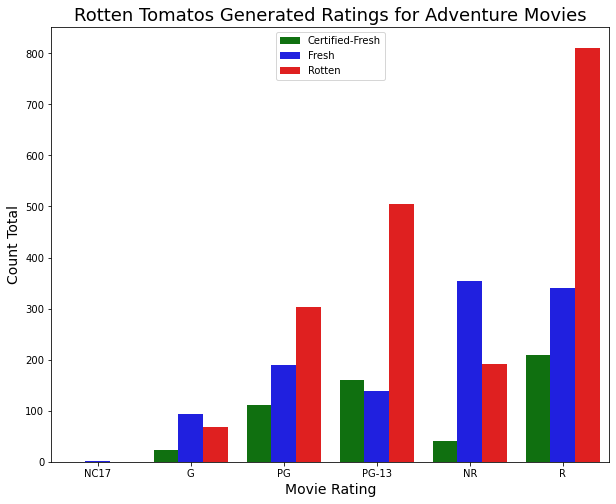

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x='content_rating', 
            y='movie_count', 
            hue='tomatometer_status',
            order=["NC17","G","PG","PG-13",'NR', 'R'],
            data=df_cor, palette=['green', 'blue', 'red'])
plt.ylabel("Count Total", size=14)
plt.xlabel("Movie Rating", size=14)
plt.title("Rotten Tomatos Generated Ratings for Adventure Movies", size=18)
plt.savefig("images/Rotten_tomatose_Ratings.png")
plt.legend()

### This visual represents the MPA rating for the movie Microsoft should make. NR should be chosen based off the fresh rating compared to the rotten score. NR is a movie that has just not been submitted for rating by the Motion Picture Association.

# Working on bom.movie_gross.csv

## Used Pandas to read the dataset, which contains information about which studios made which movies, what year each movie was made, and how much money each movie made.

In [20]:
bommovie = pd.read_csv("./data/zippedData/bom.movie_gross.csv.gz")
bommovie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## Using the sort values function, we reorganized the dataset from the movie with the highest domestic gross to the movie with the lowest domestic gross

In [21]:
bommovie = bommovie.sort_values("domestic_gross", ascending = False)
bommovie

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


## Next, we figured out what percentage of information about movies was missing.

In [ ]:
pct_missing = np.mean(bommovie["foreign_gross"].isnull())
print('{} - {}%'.format("foreign_gross", round(pct_missing*100)))

pct_missing = np.mean(bommovie["domestic_gross"].isnull())
print('{} - {}%'.format("domestic_gross", round(pct_missing*100)))

pct_missing = np.mean(bommovie["studio"].isnull())
print('{} - {}%'.format("studio", round(pct_missing*100)))

pct_missing = np.mean(bommovie["year"].isnull())
print('{} - {}%'.format("year", round(pct_missing*100)))

pct_missing = np.mean(bommovie["title"].isnull())
print('{} - {}%'.format("title", round(pct_missing*100)))

foreign_gross - 40.0%
domestic_gross - 1.0%
studio - 0.0%
year - 0.0%
title - 0.0%


## 40% of values were missing in the foreign gross column and 1% of values were missing in the domestic gross column. We dropped all of these null values to ensure the accuracy of our analyses. Due to the significant amount of data dropped from the foreign gross column, we chose to tighten our focus to domestic gross and use that as the primary indicator of movie success.

In [ ]:
bommovie = bommovie.dropna(subset=['foreign_gross'])

In [ ]:
bommovie = bommovie.dropna(subset=['domestic_gross'])

## Then, we checked that all null values were gone.

In [ ]:
pct_missing = np.mean(bommovie["foreign_gross"].isnull())
print('{} - {}%'.format("foreign_gross", round(pct_missing*100)))
pct_missing = np.mean(bommovie["domestic_gross"].isnull())
print('{} - {}%'.format("domestic_gross", round(pct_missing*100)))

## Then, we made another dataframe from the first 20 rows of the previous dataframe. Because we sorted the last dataframe by highest domestic gross, this new dataframe represents the top 20 highest grossing movies.

In [ ]:
top20 = bommovie.head(20)
top20

## We then determined which studio made the most movies in our top 20

In [ ]:
top20['studio'].value_counts(normalize=True) * 100

## We learned BV is the studio responsible for 65% of the top 20 highest grossing movies.

## Once we discovered Buena Vista (abbreviated "BV") is the movie studio that makes the majority of highest grossing movies, we made a bar chart to communicate this valuable information.

## First, we created a color palette so each studio would be represented by a certain color

In [ ]:

custom_palette = []
labels = [ ]
for x in top20["studio"]:
    labels.append(x)
    if x == "BV":
        custom_palette.append('lightskyblue')
    elif x=="Uni.":
        custom_palette.append('mediumblue')
    elif x=="WB":
        custom_palette.append('darkslateblue')
    elif x=="LGF":
        custom_palette.append('blueviolet')
    else:
        custom_palette.append('plum')

In [ ]:
labels = set(labels)

## Following this is the code to create our graph:

In [ ]:
x = top20["title"]
y = top20["domestic_gross"]

plt.figure(figsize=(15, 10))
sns.set_style('white')
sns.set_palette("bright")
bar = sns.barplot(x = x,
            y = y,
            palette=custom_palette)
custom_lines = [Line2D([0], [0], color="lightskyblue", lw=4),
                Line2D([0], [0], color="mediumblue", lw=4),
                Line2D([0], [0], color="darkslateblue", lw=4),
                Line2D([0], [0], color="blueviolet", lw=4),
                Line2D([0], [0], color="plum", lw=4)]
plt.legend(custom_lines, ['BV', 'Uni.', 'WB', "LGF", "Sony"], fontsize="xx-large") ###

plt.ylabel("Domestic Gross in Millions", size=25)
plt.xlabel("Movie", size=25)
bar.tick_params(axis='y', labelsize=20)
plt.xticks(rotation = 90, size = 20)
plt.title("Top 20 Grossing Movies by Studio", size=30)

plt.savefig("top20_barplot_Seaborn_barplot_Python.png")

plt.show();

### Microsoft's best bet for making the highest domestic gross possible is using Buena Vistas studios or modeling their own studio off of Buena Vistas studios

## First, I will add the dataframe to this project

In [ ]:
dff = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

## Next, I will drop the unnecessary columns and limit the dataframe to movies that have received at least 1,000 votes

In [ ]:
dff = dff.drop(columns=['genre_ids', 'id', 'original_language','original_title', 'popularity'])

In [ ]:
new_df = dff[dff['vote_count'] > 1000]

## Next, I will create a new column indicating the month that each movie was released

In [ ]:
new_df['release_month'] = new_df['release_date'].str[5:7]

## Finally, I will sort the dataframe by movies that received the highest rating

In [ ]:
highest_vote_average = new_df.sort_values('vote_average', ascending = False)
highest_vote_average = highest_vote_average.head(1000)

## I will now replace the numbers with numbers for each month with their corresponding name

In [ ]:
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['01'], 'Jan')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['02'], 'Feb')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['03'], 'Mar')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['04'], 'Apr')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['05'], 'May')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['06'], 'Jun')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['07'], 'Jul')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['08'], 'Aug')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['09'], 'Sep')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['10'], 'Oct')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['11'], 'Nov')
highest_vote_average['release_month'] = highest_vote_average['release_month'].replace(['12'], 'Dec')

## My organized dataframe is below

In [ ]:
highest_vote_average

## My bar graph is below

In [ ]:
bar2 = plt.barh(highest_vote_average['release_month'], highest_vote_average['vote_average'])
plt.title('Average Rating of Movies for each Month')
plt.xlabel('Rating')
plt.ylabel('Month')
plt.savefig("images/Month_and_Rating")
plt.xlim([0, 10])

### This visual shows that there is no significnce to which month a movie is released based off ratings.

# Dataframe with Director and Grossing Information

## First, I will add the dataframe with movie grossing information to this project

In [ ]:
df44 = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')


## Next, I will sort the dataframe by worldwide gross and get rid of the commas and dollar signs

In [ ]:
highest_gross = df44.sort_values('worldwide_gross', ascending=False)

In [ ]:
highest_gross['worldwide_gross'] = highest_gross['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype('int64')

## Then, I will add the dataframe with director information

In [ ]:
df33 = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')

## Now, I will drop unnecessary columns and rows with null values

In [ ]:
df33 = df33.drop(columns=['rotten_tomatoes_link', 'movie_info', 'critics_consensus', 'original_release_date', 'authors','actors', 'production_company', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'streaming_release_date', 'runtime'])

In [ ]:
df33 = df33.dropna()

## After that, I will filter out genres that do not contain the word adventure

In [ ]:
df33 = df33[df33['genres'].str.contains('Adventure')]

## Next, I will merge the two dataframes together based on movie title

In [ ]:
final_df = pd.merge(df33, highest_gross, how='inner', left_on='movie_title', right_on='movie')

## I will then remove commas and dollar signs and create a profit column

In [ ]:
final_df['production_budget'] = final_df['production_budget'].apply(lambda x: x.replace(',', '').replace('$', '')).astype('int64')

In [ ]:
final_df['production_budget'] = final_df['production_budget'].astype('int64')

In [ ]:
final_df['profit'] = final_df['worldwide_gross'] - final_df['production_budget']

## I will create a new dataframe combining the directors top 10 directors so that I can compare their average profits

In [ ]:
directors_df = final_df.groupby('directors').mean()

In [ ]:
directors_df = directors_df.sort_values('profit', ascending = False)

In [ ]:
directors_df = directors_df.head(10)

## My organized dataframe is below

In [ ]:
directors_df

## My bar graph is below

In [ ]:
bar4 = plt.barh(directors_df.index, directors_df['profit'])
plt.title('Adventure Movie Directors with Most Profitable Movies on Average')
plt.xlabel('Profit (hundred million)')
plt.ylabel('Directors')
plt.savefig("images/Directors_and_Profit_for_Adventure_Movies", bbox_inches='tight')

### Microsoft's best choice of Director is Jean Negulesco based off his involvement in the production of the most Profitable Adventure movies.

# Conclusion

## We suggest using Buena Vistas studios or modeling Microsoft's studio after BV practices. Addtionally, Microsoft should create an Adventure movie with an NR rating, with a run time between 100 minutes and 131 minutes. We also recommend hiring Jean Negulsesco as the director and to not worry about release month. This should create the most profitable movie.
